In [1]:
# Install necessary libraries
!pip install nltk scikit-learn matplotlib seaborn

In [9]:
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download required NLTK datasets
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Create a DataFrame
tweets = pd.DataFrame({
    'tweet': positive_tweets + negative_tweets,
    'sentiment': ['positive'] * len(positive_tweets) + ['negative'] * len(negative_tweets)
})

# Display the first few rows of the dataset
tweets.head()

,tweet,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive
2,@DespiteOfficial we had a listen last night :)...,positive
3,@97sides CONGRATS :),positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive


In [11]:
# Initialize tokenizer, stemmer, and stopwords
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Tokenize
    tokens = tokenizer.tokenize(tweet)
    # Remove stopwords and non-alphabetic tokens, and perform stemming
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(cleaned_tokens)

# Apply cleaning to the tweets
tweets['cleaned_tweet'] = tweets['tweet'].apply(clean_tweet)

# Display the cleaned tweets
tweets.head()

,tweet,sentiment,cleaned_tweet
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,top engag member commun week
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,hey jame odd pleas call contact centr abl assi...
2,@DespiteOfficial we had a listen last night :)...,positive,listen last night bleed amaz track scotland
3,@97sides CONGRATS :),positive,congrat
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,yeaaah yipppi accnt verifi rqst succeed got bl...


In [12]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(tweets['cleaned_tweet']).toarray()
y = tweets['sentiment']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.76      0.74       988
    positive       0.75      0.72      0.74      1012

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



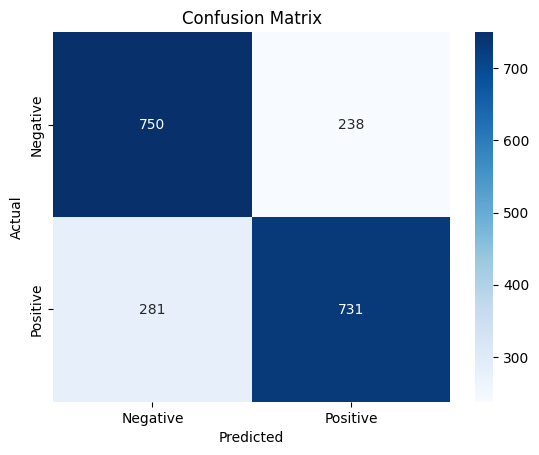

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-15-1ba6def74a7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, palette='viridis')


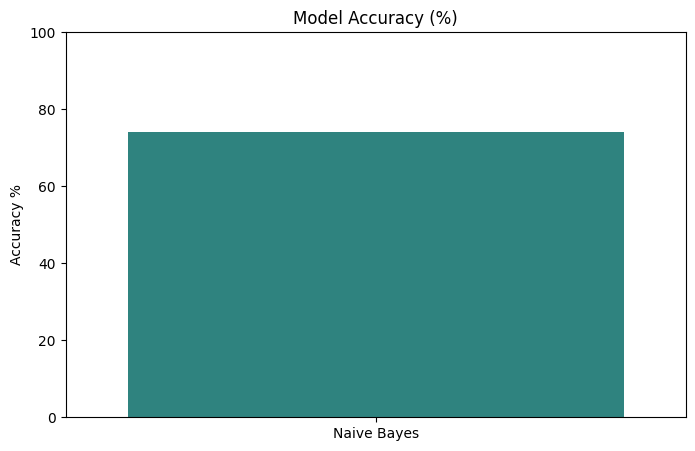

In [15]:
# Accuracy Visualization
accuracy_values = [accuracy * 100]
models = ['Naive Bayes']

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_values, palette='viridis')
plt.title('Model Accuracy (%)')
plt.ylabel('Accuracy %')
plt.ylim(0, 100)
plt.show()

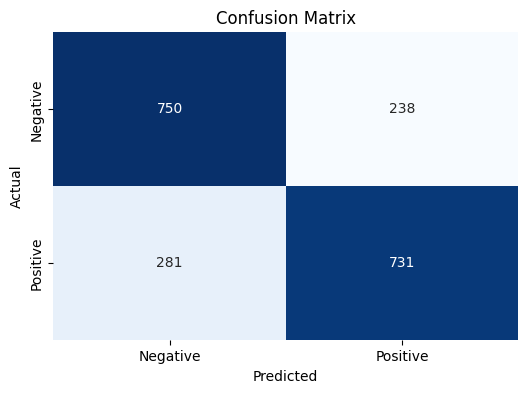

In [16]:
# Enhanced Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

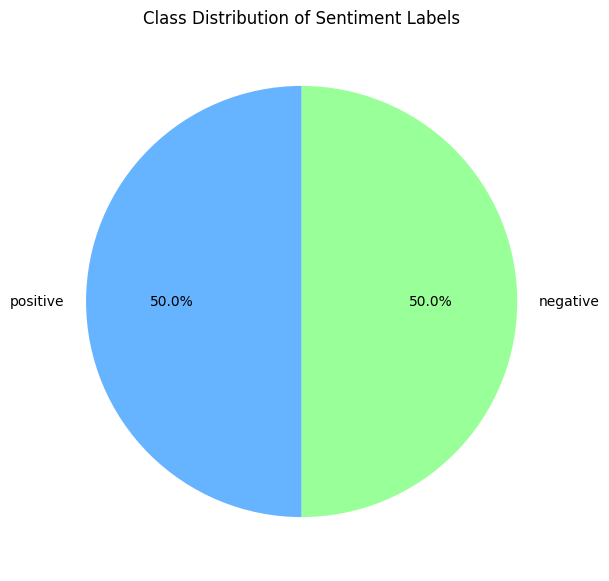

In [17]:
# Class Distribution Visualization
class_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Class Distribution of Sentiment Labels')
plt.show()